Importing the required libraries

In [87]:
import numpy as np
import pandas as pd
import warnings
import codecs

In [88]:
warnings.filterwarnings('ignore')

In [122]:
columns_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.data", sep='\t', names=columns_names)

Displaying the top 5 elements of the csv file

In [90]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [91]:
df.shape

(100000, 4)

In [92]:
# Finding total number of unique users

df["user_id"].nunique()

943

In [93]:
# Finding total number of movie items 

df["item_id"].nunique()

1682

In [121]:
movies_titles = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.item", sep="\|", header=None, encoding="ISO-8859-1")

In [95]:
movies_titles.shape

(1682, 24)

In [96]:
movies_titles = movies_titles[[0,1]]

In [97]:
movies_titles.columns = ['item_id', 'Title']
movies_titles.head()

,item_id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [98]:
df = pd.merge(df, movies_titles, on="item_id")

In [99]:
df.tail()

,user_id,item_id,rating,timestamp,Title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [101]:
df.groupby('Title').mean()['rating'].sort_values(ascending=False)

Title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [102]:
df.groupby('Title').count()['rating'].sort_values(ascending=False)

Title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [103]:
ratings = pd.DataFrame(df.groupby('Title').mean()['rating'])

In [104]:
ratings.head()

,rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [105]:
ratings['Number of ratings'] = pd.DataFrame(df.groupby('Title').count()['rating'])

In [106]:
ratings.sort_values(by='rating', ascending=False)

,rating,Number of ratings
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


Visualizing the Dataset 

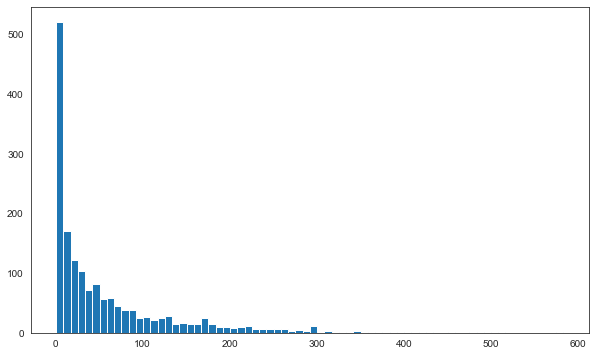

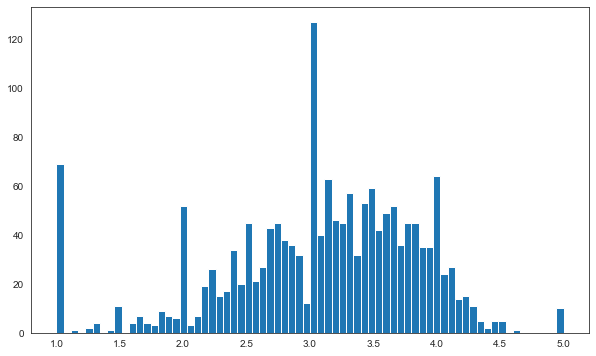

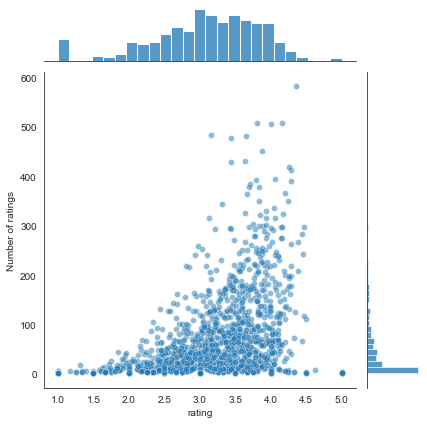

In [107]:
plt.figure(figsize=(10,6))
plt.hist(ratings['Number of ratings'], bins=70)
plt.show()
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'], bins=70)
plt.show()
sns.jointplot(x='rating', y='Number of ratings', data=ratings, alpha=0.5)

In [108]:
movie_mat = df.pivot_table(index="user_id", columns="Title", values="rating")

In [109]:
movie_mat.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [110]:
ratings.sort_values('Number of ratings', ascending=False)

,rating,Number of ratings
Title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [111]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [112]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)

In [113]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])

In [114]:
corr_starwars.dropna(inplace=True) #remove nan values 

In [115]:
corr_starwars.sort_values('Correlation', ascending=False)        #1 means highly correlated

,Correlation
Title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [116]:
corr_starwars = corr_starwars.join(ratings['Number of ratings'])

In [117]:
corr_starwars[corr_starwars['Number of ratings']>100].sort_values('Correlation', ascending = False)

,Correlation,Number of ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [118]:
def predict_movies(movie_name):
    movie_user_rating = movie_mat[movie_name]
    similar_to_movie = movie_mat.corrwith(starwars_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings["Number of ratings"])
    predictions = corr_movie[corr_movie['Number of ratings']>100].sort_values('Correlation', ascending = False)
    return predictions

In [119]:
predictions = predict_movies("Titanic (1997)")

In [120]:
print("Recommended Movies are: ")
predictions.head()

Recommended Movies are: 


,Correlation,Number of ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
